In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn import linear_model, svm, neighbors, naive_bayes
from sklearn.model_selection import KFold
from sklearn import metrics, preprocessing

from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

from scipy.cluster.hierarchy import linkage,dendrogram, cut_tree
from sklearn.cluster import DBSCAN, KMeans

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Regressão

## Lista 7

In [2]:
kfold = KFold(n_splits=5)

In [3]:
X_,y = datasets.load_boston(return_X_y=True)

In [4]:
X = preprocessing.StandardScaler().fit_transform(X_)

In [5]:
def regressao(model,X_,y_):
    mae = 0.0
    rmse = 0.0
    for train_index,test_index in kfold.split(X):
        X_train = X_[train_index]
        y_train = y_[train_index]
        X_test = X_[test_index]
        y_test = y_[test_index]
        
        #scale = preprocessing.StandardScaler().fit(X_train)
        #X_train_std = scale.transform(X_train)
        #X_test_std = scale.transform(X_test)
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
        mae += metrics.mean_absolute_error(y_test,y_pred)
        rmse += np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print("MAE: "+ str((mae/5)) + " RMSE: "+ str((rmse/5)))      

In [6]:
modelGD = linear_model.SGDRegressor()
regressao(modelGD,X,y)

MAE: 4.477461174707252 RMSE: 6.442357918892371


/home/segundo/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [7]:
modelLR = linear_model.LinearRegression()
regressao(modelLR,X,y)

MAE: 4.256574046803889 RMSE: 5.836431226523883


In [8]:
modelKNNR = neighbors.KNeighborsRegressor()
regressao(modelKNNR,X,y)

MAE: 3.7022620850320322 RMSE: 5.339938367358775


In [9]:
modelSVMR = svm.SVR()
regressao(modelSVMR,X,y)

MAE: 4.223314829625372 RMSE: 6.303613529310935


## Lista 11

In [10]:
estimativas = [50, 100, 200]
max_depths = [3, 5, 7]
learning_rates = [0.1, 0.05, 0.01]

#### DecisionTreeRegressor

In [11]:
modelDTR = DecisionTreeRegressor(random_state=0)
regressao(modelDTR,X_,y)

MAE: 4.030607649000194 RMSE: 6.243777829603954


#### RandomForestRegressor

In [12]:
for i in estimativas:
    for j in max_depths:
        rFReg = RandomForestRegressor(n_estimators=i,max_depth=j)
        print("n_estimators=",i, " - max_depth=", j)
        regressao(rFReg,X_,y)
        print("\n")

n_estimators= 50  - max_depth= 3
MAE: 3.4856628137374175 RMSE: 4.856347763683925


n_estimators= 50  - max_depth= 5
MAE: 3.1305633141760487 RMSE: 4.565243874645683


n_estimators= 50  - max_depth= 7
MAE: 3.02001494827132 RMSE: 4.434732253377621


n_estimators= 100  - max_depth= 3
MAE: 3.487117100033391 RMSE: 4.912935744863871


n_estimators= 100  - max_depth= 5
MAE: 3.158014792523023 RMSE: 4.616663490981134


n_estimators= 100  - max_depth= 7
MAE: 3.0160595768238747 RMSE: 4.444365918044426


n_estimators= 200  - max_depth= 3
MAE: 3.4602282117618515 RMSE: 4.878855407477365


n_estimators= 200  - max_depth= 5
MAE: 3.0859432035838807 RMSE: 4.5518602682269576


n_estimators= 200  - max_depth= 7
MAE: 3.077672093521472 RMSE: 4.507175925132428




#### GradientBoostingRegressor

In [13]:
for i in estimativas:
    for j in max_depths:
        for k in learning_rates:
            gBReg = GradientBoostingRegressor(learning_rate=k,n_estimators=i,max_depth=j)
            print("n_estimators=",i, " - max_depth=", j, " - learning_rate=", k)
            regressao(gBReg,X_,y)
            print("\n")

n_estimators= 50  - max_depth= 3  - learning_rate= 0.1
MAE: 3.041211155040151 RMSE: 4.304720208173043


n_estimators= 50  - max_depth= 3  - learning_rate= 0.05
MAE: 3.2363486839872264 RMSE: 4.587762776213927


n_estimators= 50  - max_depth= 3  - learning_rate= 0.01
MAE: 5.372069947869653 RMSE: 7.298381426029588


n_estimators= 50  - max_depth= 5  - learning_rate= 0.1
MAE: 3.327426543001343 RMSE: 5.011316301791821


n_estimators= 50  - max_depth= 5  - learning_rate= 0.05
MAE: 3.498047306573011 RMSE: 5.236902371926217


n_estimators= 50  - max_depth= 5  - learning_rate= 0.01
MAE: 5.21027774289311 RMSE: 7.1673722074800805


n_estimators= 50  - max_depth= 7  - learning_rate= 0.1
MAE: 3.262576222510988 RMSE: 5.192801269870319


n_estimators= 50  - max_depth= 7  - learning_rate= 0.05
MAE: 3.346824947643583 RMSE: 5.218711463838252


n_estimators= 50  - max_depth= 7  - learning_rate= 0.01
MAE: 5.164072846377582 RMSE: 7.1190501079495245


n_estimators= 100  - max_depth= 3  - learning_rate= 0.1


#### Modelo Final

In [14]:
modelRegression = RandomForestRegressor(n_estimators=100, max_depth=5)
modelRegression.fit(X_,y)
y_pred = modelRegression.predict(X_)

In [15]:
mae = metrics.mean_absolute_error(y,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y,y_pred))
print("MAE: "+ str((mae)) + "\nRMSE: "+ str((rmse)))

MAE: 1.7649966421807077
RMSE: 2.305985142016667


In [16]:
print(modelRegression.feature_importances_)

[3.48916527e-02 3.22542030e-04 2.53168518e-03 7.55240349e-04
 2.23618779e-02 4.70070215e-01 6.48684064e-03 5.75242795e-02
 1.93633189e-03 8.99774154e-03 1.37554848e-02 5.76052131e-03
 3.74605587e-01]


# Classificação

## Lista 7

In [17]:
X_,y = datasets.load_breast_cancer(return_X_y=True)

In [18]:
X = preprocessing.MinMaxScaler().fit_transform(X_)

In [19]:
def classification(model,X_,y_):
    accuracy = 0.0
    recall = 0.0
    f1 = 0.0
    auc = 0.0
    precison = 0.0
    for train_index, test_index in kfold.split(X):
        X_train = X_[train_index]
        y_train = y_[train_index]
        X_test = X_[test_index]
        y_test = y_[test_index]
        
        #norm = preprocessing.MinMaxScaler().fit(X_train)
        #X_train_norm = norm.transform(X_train)
        #X_test_norm = norm.transform(X_test)
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
        conf_matriz = metrics.confusion_matrix(y_test,y_pred)
        print(conf_matriz)
        
        accuracy += metrics.accuracy_score(y_test,y_pred)
        recall += metrics.recall_score(y_test,y_pred)
        f1 += metrics.f1_score(y_test,y_pred)
        auc += metrics.roc_auc_score(y_test,y_pred)
        precison += metrics.precision_score(y_test,y_pred)
    print("accuracy: " + str((accuracy/5)) + "\nprecison: " + str((precison/5)) +  "\nrecall: "+ str((recall/5)) +
          "\nf1: "+ str((f1/5)) + "\nauc: "+ str((auc/5)))

In [20]:
modelLoR = linear_model.LogisticRegression()
classification(modelLoR,X,y)

[[58 10]
 [ 1 45]]
[[41  8]
 [ 0 65]]
[[36  4]
 [ 0 74]]
[[28  1]
 [ 1 84]]
[[26  0]
 [ 1 86]]
accuracy: 0.9543704393727681
precison: 0.9291092039843047
recall: 0.9910003821618603
f1: 0.9578514504482583
auc: 0.951019502253675


In [21]:
modelKNNC = neighbors.KNeighborsClassifier()
classification(modelKNNC,X,y)

[[61  7]
 [ 2 44]]
[[46  3]
 [ 0 65]]
[[36  4]
 [ 0 74]]
[[27  2]
 [ 0 85]]
[[26  0]
 [ 3 84]]
accuracy: 0.9631113181183046
precison: 0.9488713787902429
recall: 0.9844077961019491
f1: 0.9658345095536731
auc: 0.9588907797001859


In [22]:
modelNB = naive_bayes.GaussianNB()
classification(modelNB,X,y)

[[58 10]
 [ 4 42]]
[[43  6]
 [ 2 63]]
[[37  3]
 [ 3 71]]
[[27  2]
 [ 1 84]]
[[24  2]
 [ 7 80]]
accuracy: 0.9296848315478963
precison: 0.9265098375113417
recall: 0.9499018461907605
f1: 0.9372205053092115
auc: 0.9259112833668098


In [23]:
modelSVMC = svm.SVC()
classification(modelSVMC,X,y)

[[52 16]
 [ 0 46]]
[[40  9]
 [ 0 65]]
[[36  4]
 [ 0 74]]
[[27  2]
 [ 0 85]]
[[24  2]
 [ 1 86]]
accuracy: 0.9403043005744449
precison: 0.9046632064985791
recall: 0.9977011494252874
f1: 0.9464034193639435
auc: 0.9323649565927168


## Lista 11

#### DecisionTreeClassifier

In [24]:
modelDTC = DecisionTreeClassifier(random_state=0)
classification(modelDTC,X_,y)

[[58 10]
 [ 4 42]]
[[44  5]
 [ 5 60]]
[[37  3]
 [ 3 71]]
[[28  1]
 [ 6 79]]
[[23  3]
 [15 72]]
accuracy: 0.9032293122185996
precison: 0.927545738045738
recall: 0.9105155664799373
f1: 0.9172287772287773
auc: 0.9078610818538438


#### RandomForestClassifier

In [25]:
for i in estimativas:
    for j in max_depths:
        rFClass = RandomForestClassifier(n_estimators=i, max_depth=j)
        print("n_estimators=",i, " - max_depth=", j)
        classification(rFClass,X_,y)
        print("\n")

n_estimators= 50  - max_depth= 3
[[58 10]
 [ 1 45]]
[[44  5]
 [ 3 62]]
[[37  3]
 [ 0 74]]
[[27  2]
 [ 3 82]]
[[26  0]
 [ 2 85]]
accuracy: 0.9490917559385188
precison: 0.9361568779479228
recall: 0.9747648800034373
f1: 0.9538803585685287
auc: 0.9480759242919865


n_estimators= 50  - max_depth= 5
[[58 10]
 [ 2 44]]
[[45  4]
 [ 2 63]]
[[37  3]
 [ 0 74]]
[[28  1]
 [ 2 83]]
[[26  0]
 [ 3 84]]
accuracy: 0.952585002328831
precison: 0.94084950428234
recall: 0.9735480675951618
f1: 0.9558765131875034
auc: 0.9529566102764484


n_estimators= 50  - max_depth= 7
[[59  9]
 [ 2 44]]
[[46  3]
 [ 3 62]]
[[37  3]
 [ 0 74]]
[[27  2]
 [ 2 83]]
[[26  0]
 [ 2 85]]
accuracy: 0.9543549138332557
precison: 0.9443088764731385
recall: 0.9727699950929513
f1: 0.9575420348649437
auc: 0.9526307027250989


n_estimators= 100  - max_depth= 3
[[57 11]
 [ 1 45]]
[[45  4]
 [ 4 61]]
[[37  3]
 [ 0 74]]
[[27  2]
 [ 3 82]]
[[26  0]
 [ 2 85]]
accuracy: 0.9473373699736065
precison: 0.9358524808524809
recall: 0.9716879569265142
f1:

#### GradientBoostingClassifier

In [26]:
for i in estimativas:
    for j in max_depths:
        for k in learning_rates:
            gBClass = GradientBoostingClassifier(learning_rate=k,n_estimators=i,max_depth=j)
            print("n_estimators=",i, " - max_depth=", j, " - learning_rate=", k)
            classification(gBClass,X_,y)
            print("\n")

n_estimators= 50  - max_depth= 3  - learning_rate= 0.1
[[60  8]
 [ 2 44]]
[[45  4]
 [ 4 61]]
[[39  1]
 [ 1 73]]
[[28  1]
 [ 4 81]]
[[26  0]
 [ 2 85]]
accuracy: 0.9526005278683435
precison: 0.9517813498301303
recall: 0.9622844869603842
f1: 0.9562678363768542
auc: 0.9552659964296479


n_estimators= 50  - max_depth= 3  - learning_rate= 0.05
[[56 12]
 [ 2 44]]
[[43  6]
 [ 4 61]]
[[38  2]
 [ 1 73]]
[[27  2]
 [ 4 81]]
[[26  0]
 [ 3 84]]
accuracy: 0.9367955286446203
precison: 0.929079798939896
recall: 0.9599856363856716
f1: 0.9427190297460625
auc: 0.9382043096859849


n_estimators= 50  - max_depth= 3  - learning_rate= 0.01
[[54 14]
 [ 2 44]]
[[43  6]
 [ 2 63]]
[[37  3]
 [ 2 72]]
[[27  2]
 [ 4 81]]
[[23  3]
 [ 6 81]]
accuracy: 0.9226672876882471
precison: 0.9143706993319174
recall: 0.9565402281126772
f1: 0.9329098883950027
auc: 0.9195019675404378


n_estimators= 50  - max_depth= 5  - learning_rate= 0.1
[[57 11]
 [ 0 46]]
[[42  7]
 [ 3 62]]
[[38  2]
 [ 1 73]]
[[29  0]
 [ 5 80]]
[[25  1]
 [ 6 81

## modelo Final

In [27]:
modelClassification = RandomForestClassifier()
modelClassification.fit(X_,y)
y_pred = modelClassification.predict(X_)

In [28]:
print(metrics.recall_score(y,y_pred))

0.9971988795518207


In [29]:
print(modelClassification.feature_importances_)

[0.18558583 0.0125771  0.06714698 0.06081528 0.00465182 0.01463002
 0.0331365  0.02726932 0.00466899 0.00430291 0.0058497  0.00516288
 0.00476053 0.01269838 0.00092948 0.00252552 0.00243462 0.00166766
 0.00073088 0.00846587 0.02137114 0.01113706 0.29234544 0.10195131
 0.01809423 0.0220042  0.0171766  0.0452203  0.00547804 0.00521142]


# Lista 13

In [52]:
data = pd.read_csv("csvs/data_1024.csv", sep="\t")
#data = np.genfromtxt("csvs/data_1024.csv", skip_header=1, delimiter="\t")
X = data.drop(labels=['Driver_ID'],axis=1)

### single

In [31]:
hc_single = linkage(X,method="single", metric="euclidean")

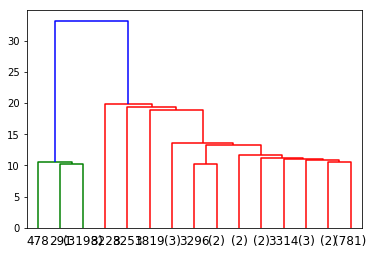

In [32]:
dendrogram_single = dendrogram(hc_single,truncate_mode="lastp",p=15)

### Complete

In [33]:
hc_complete = linkage(X,method="complete", metric="euclidean")

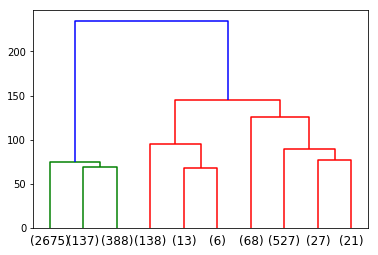

In [34]:
dendrogram_complete = dendrogram(hc_complete,truncate_mode="lastp", p=10)

### Average

In [35]:
hc_average = linkage(X, method="average", metric="euclidean")

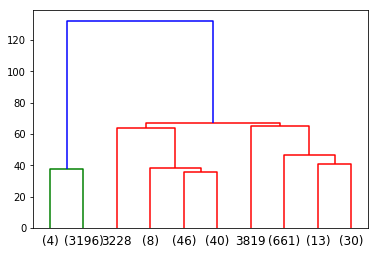

In [36]:
dendrogram_average = dendrogram(hc_average,truncate_mode="lastp", p=10)

In [53]:
y_ = cut_tree(hc_complete, n_clusters=3)
y_.shape

(4000, 1)

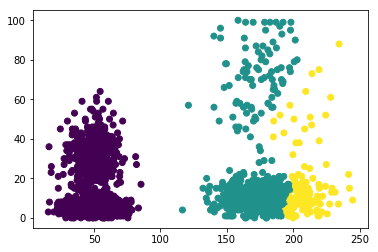

In [55]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_.reshape(4000,))

## DBSCAN

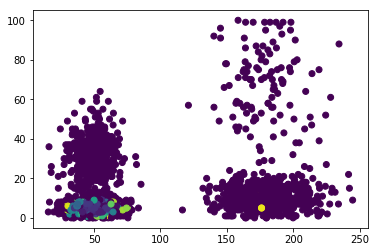

In [39]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X.iloc[:,0],X.iloc[:,1],c = y_dbscan)
plt.show();

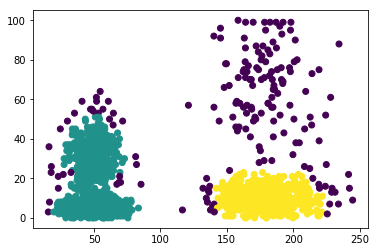

In [40]:
dbscan = DBSCAN(eps=5, min_samples=10, metric="euclidean")
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X.iloc[:,0],X.iloc[:,1],c = y_dbscan)
plt.show();

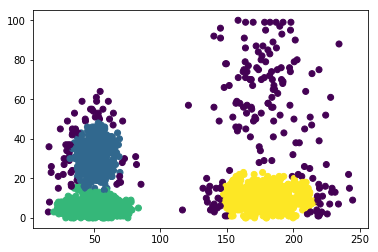

In [41]:
dbscan = DBSCAN(eps=5, min_samples=20, metric="euclidean")
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X.iloc[:,0],X.iloc[:,1],c = y_dbscan)
plt.show();

### 1  Quais as diferenças entre feature selection e feature extraction? 

* Feature extraction tranforma as features existentes em um espaço dimensional menor, enquanto a Feature selection seleciona um subconjunto das features existentes sem haver tranformação.

### 2 Dê exemplos de técnicas usadas para feature selection.

* l1, l2 e ElasticNet.

 
### 4 Dê exemplos de técnicas usadas para feature extraction. 

*  PCA e LDA.

In [42]:
X,y = datasets.load_iris(return_X_y=True)

### PCA

In [43]:
pca = PCA(n_components=2)
X_ = pca.fit_transform(X,y)

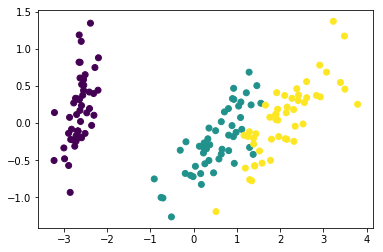

In [44]:
plt.scatter(X_[:,0],X_[:,1],c=y);

### LDA

In [45]:
lda = LDA(n_components=2)
X_ = lda.fit_transform(X,y)

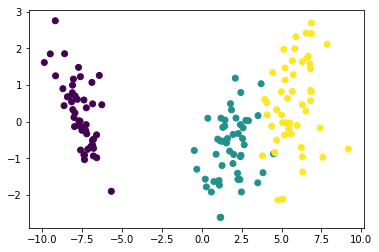

In [46]:
plt.scatter(X_[:,0],X_[:,1],c=y);

# LISTA 12

In [47]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300,random_state=0)
y_pred_km = kmeans.fit_predict(data)

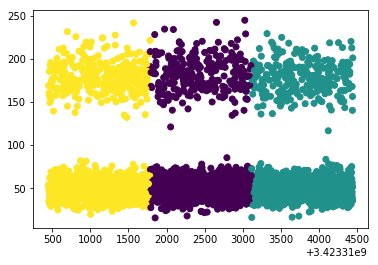

In [48]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=y_pred_km)

In [49]:
print('Distortion: %.2f' % kmeans.inertia_)

Distortion: 604776163.88


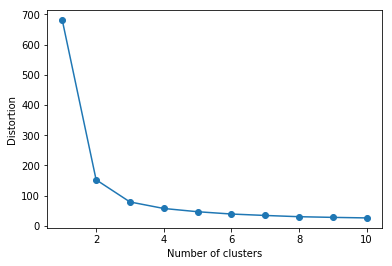

In [50]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()